In [9]:
%matplotlib inline
import os
os.chdir("../")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import json
from src import utils
from IPython.display import clear_output
import pickle
from collections import Counter


In [ ]:


# Function to get unique numbers and their counts
def get_unique_and_counts(numbers):
    # Use Counter to count occurrences
    occurrences = Counter(numbers)
    
    # Sort the unique numbers and their counts
    unique_numbers = sorted(occurrences.keys())
    counts = [occurrences[number] for number in unique_numbers]
    
    return unique_numbers, counts

def align(lengths, l, c):
    counts= [0] * len(lengths)
    
    
    for i in range(len(lengths)):
        
        
        if lengths[i] in l:
            
            
            counts[i] = c[l.index(lengths[i])]

    return counts

with open("/NL/token-pricing/work/outputs/fixed_string/Llama/total_tok.pkl", "rb") as f:
    tok = pickle.load(f)
    tok = [len(i) for i in tok]

with open("/NL/token-pricing/work/outputs/fixed_string/Llama/plaussibility_p0.95_k2000_maxlength13_multi.pkl", "rb") as f:
    tok_095_2000 = pickle.load(f)
    tok_095= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_p_met"]==True]
    tok__2000= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_k_met"]==True]
    
with open("/NL/token-pricing/work/outputs/fixed_string/Llama/plaussibility_p0.99_k5000_maxlength13_multi.pkl", "rb") as f:
    tok_099_5000 = pickle.load(f)
    tok_099= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_p_met"]==True]
    tok__5000= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_k_met"]==True]
    
with open("/NL/token-pricing/work/outputs/fixed_string/Llama/plaussibility_p0.9_k2000_maxlength13_multi_language models.pkl", "rb") as f:
    tok_09 = pickle.load(f)
    tok_09= [len(i[0]) for i in tok_09 if i[1]["all_top_p_met"]==True]
    

    

lengths, counts = get_unique_and_counts(tok)
lengths_095, counts_095 = get_unique_and_counts(tok_095)
lengths_099, counts_099 = get_unique_and_counts(tok_099)
lengths_09, counts_09 = get_unique_and_counts(tok_09)
lengths__2000, counts__2000 = get_unique_and_counts(tok__2000)
lengths__5000, counts__5000 = get_unique_and_counts(tok__5000)

counts_09 = align(lengths, lengths_09, counts_09)
counts_095 = align(lengths, lengths_095, counts_095)
counts_099 = align(lengths, lengths_099, counts_099)

counts__2000 = align(lengths, lengths__2000, counts__2000)
counts__5000 = align(lengths, lengths__5000, counts__5000)


#Create dataframe
df = pd.DataFrame({"lengths": lengths, "counts": counts,"counts_09" : counts_09, "counts_095": counts_095, "counts_099": counts_099, "counts__2000": counts__2000, "counts__5000": counts__5000})


#df_long = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_08_', 'counts_09_', 'counts_095_', 'counts_099_'],  var_name='class', value_name='y')

df_long_p = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_099','counts_09' ],  var_name='class', value_name='y')
df_long_k = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts__5000', 'counts__2000'],  var_name='class', value_name='y')

print(sum(counts_099))
print(sum(counts_095))
print(sum(counts_09))





In [ ]:



sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469

palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

#palette = {"counts": "blue", "counts_08_": "orange", "counts_09_": "green", "counts_095_": "red", "counts_099_": "purple"}
# draw axis
sns.barplot(data=df_long_p, x="lengths",y="y",hue="class", palette=[palette[2], palette[1], palette[0]], ax=ax, width=1, legend=False)   

#ax.legend(title="p", loc='upper left')
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles=handles,fontsize="small",loc='upper right', title='', labels=[r"No top-$p$",r"$p=0.99$", r"$p=0.90$"])


plt.hlines(y=1.6, xmin=-0.45, xmax=0.45, colors='black', linewidth=0.7)
plt.vlines(x=-0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.text(-0.13,1.5,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,15])
ax.set_ylim([0.5,2*10**3])

sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length")
ax.set_ylabel("Number of tokenizations")

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topp_llm.pdf', dpi=300)

In [ ]:

sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469

palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

#palette = {"counts": "blue", "counts_08_": "orange", "counts_09_": "green", "counts_095_": "red", "counts_099_": "purple"}
# draw axis
sns.barplot(data=df_long_k, x="lengths",y="y",hue="class", palette=[palette[2],palette[1],palette[0]], ax=ax, width=1, legend=False)   

#ax.legend(title="p", loc='upper left')
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles=handles,fontsize="small",loc='upper right', title='', labels=[r"No top-$k$",r"$k=5000$", r"$k=2000$"])


plt.hlines(y=1.6, xmin=-0.45, xmax=0.45, colors='black', linewidth=0.7)
plt.vlines(x=-0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.text(-0.13,1.5,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,15])
ax.set_ylim([0.5,10**3])

sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length")
ax.set_ylabel("Number of tokenizations")

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topk_llm.pdf', dpi=300)

In [4]:


# Function to get unique numbers and their counts
def get_unique_and_counts(numbers):
    # Use Counter to count occurrences
    occurrences = Counter(numbers)
    
    # Sort the unique numbers and their counts
    unique_numbers = sorted(occurrences.keys())
    counts = [occurrences[number] for number in unique_numbers]
    
    return unique_numbers, counts

def align(lengths, l, c):
    counts= [0] * len(lengths)
    
    
    for i in range(len(lengths)):
        
        
        if lengths[i] in l:
            
            
            counts[i] = c[l.index(lengths[i])]

    return counts

with open("/NL/token-pricing/work/outputs/fixed_string/Gemma/tokenizations_fixed_causeless.pkl", "rb") as f:
    tok = pickle.load(f)
    tok = [len(i) for i in tok]

with open("/NL/token-pricing/work/outputs/fixed_string/Gemma/plaussibility_p0.95_k2000_maxlength13_multi_causeless.pkl", "rb") as f:
    tok_095_2000 = pickle.load(f)
    tok_095= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_p_met"]==True]
    tok__2000= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_k_met"]==True]
    
with open("/NL/token-pricing/work/outputs/fixed_string/Gemma/plaussibility_p0.99_k5000_maxlength13_multi_causeless.pkl", "rb") as f:
    tok_099_5000 = pickle.load(f)
    tok_099= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_p_met"]==True]
    tok__5000= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_k_met"]==True]


with open("/NL/token-pricing/work/outputs/fixed_string/Gemma/plaussibility_p0.98_k2000_maxlength13_multi_causeless.pkl", "rb") as f:
    tok_098_2000 = pickle.load(f)
    tok_098= [len(i[0]) for i in tok_098_2000 if i[1]["all_top_p_met"]==True]
    
# with open("/NL/token-pricing/work/src/plaussibility_p0.9_k2000_maxlength13_multi_causeless.pkl", "rb") as f:
#     tok_09 = pickle.load(f)
#     tok_09 = [len(i[0]) for i in tok_09 if i[1]["all_top_p_met"]==True]
    


    

lengths, counts = get_unique_and_counts(tok)
#lengths_09, counts_09 = get_unique_and_counts(tok_09)
lengths_095, counts_095 = get_unique_and_counts(tok_095)
lengths_099, counts_099 = get_unique_and_counts(tok_099)
lengths_098, counts_098 = get_unique_and_counts(tok_098)

lengths__2000, counts__2000 = get_unique_and_counts(tok__2000)
lengths__5000, counts__5000 = get_unique_and_counts(tok__5000)

#counts_09 = align(lengths, lengths_09, counts_09)
counts_095 = align(lengths, lengths_095, counts_095)
counts_099 = align(lengths, lengths_099, counts_099)
counts_098 = align(lengths, lengths_098, counts_098)
counts__2000 = align(lengths, lengths__2000, counts__2000)
counts__5000 = align(lengths, lengths__5000, counts__5000)


#Create dataframe
df = pd.DataFrame({"lengths": lengths, "counts": counts, "counts_098": counts_098,"counts_095": counts_095, "counts_099": counts_099, "counts__2000": counts__2000, "counts__5000": counts__5000})


#df_long = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_08_', 'counts_09_', 'counts_095_', 'counts_099_'],  var_name='class', value_name='y')

df_long_p = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_099','counts_098' ],  var_name='class', value_name='y')
df_long_k = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts__5000', 'counts__2000'],  var_name='class', value_name='y')


[Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '4'), Text(3, 0, '5'), Text(4, 0, '6'), Text(5, 0, '7'), Text(6, 0, '8'), Text(7, 0, '9')]
212


/tmp/ipykernel_2116585/1779275626.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)  # Update the x-axis labels


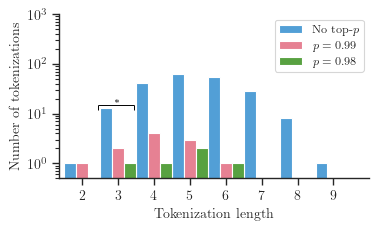

In [5]:



sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469
palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

#palette = {"counts": "blue", "counts_08_": "orange", "counts_09_": "green", "counts_095_": "red", "counts_099_": "purple"}
# draw axis
sns.barplot(data=df_long_p, x="lengths",y="y",hue="class", palette=permuted_palette, ax=ax, width=1, legend=True)   

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles,fontsize="small",loc='upper right', title='', labels=[r"No top-$p$",r"$p=0.99$", r"$p=0.98$"])


sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length")
ax.set_ylabel("Number of tokenizations")

print(ax.get_xticklabels())
x_labels = ax.get_xticklabels()  # Get the current x-axis labels
ax.set_xticklabels(x_labels)  # Update the x-axis labels

plt.hlines(y=15, xmin=0.45, xmax=1.45, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=12 ,ymax=15, colors='black', linewidth=0.7)
plt.vlines(x=1.45, ymin=12 ,ymax=15, colors='black', linewidth=0.7)
plt.text(0.90,16,"*", color="black", fontsize=8)

print(sum(counts))

ax.set_xlim([-0.65,8])
ax.set_ylim([0.5,10**3])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topp_causeless.pdf', dpi=300)

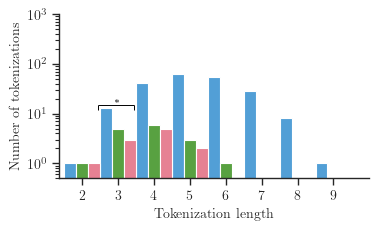

In [6]:



sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469

palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

#palette = {"counts": "blue", "counts_08_": "orange", "counts_09_": "green", "counts_095_": "red", "counts_099_": "purple"}
# draw axis
sns.barplot(data=df_long_k, x="lengths",y="y",hue="class", palette=[palette[2],palette[1],palette[0]], ax=ax, width=1, legend=False)   

#ax.legend(title="p", loc='upper left')
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles=handles,fontsize="small",loc='upper right', title='', labels=[r"No top-$k$",r"$k=5000$", r"$k=2000$"])


plt.hlines(y=15, xmin=0.45, xmax=1.45, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=12 ,ymax=15, colors='black', linewidth=0.7)
plt.vlines(x=1.45, ymin=12 ,ymax=15, colors='black', linewidth=0.7)
plt.text(0.90,16,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,8])
ax.set_ylim([0.5,10**3])

sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length")
ax.set_ylabel("Number of tokenizations")

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topk_causeless.pdf', dpi=300)

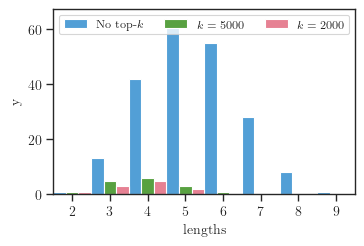

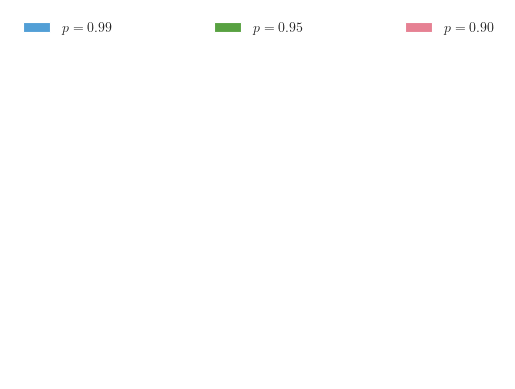

In [11]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

sns.barplot(data=df_long_k, x="lengths",y="y",hue="class", palette=[palette[2],palette[1],palette[0]], ax=ax, width=1, legend=True)   

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,fontsize="small",loc='upper right', title='', labels=[r"No top-$k$",r"$k=5000$", r"$k=2000$"], mode="expand", ncol=3)



#handles, labels = ax.get_legend_handles_labels()
fig, axe = plt.subplots(1)
axe.legend(handles=handles, labels=[r"$p=0.99$",r"$p=0.95$", r"$p=0.90$"], loc="upper right", mode="expand", ncol=3, frameon=False)
axe.xaxis.set_visible(False)
axe.yaxis.set_visible(False)
for v in axe.spines.values():
    v.set_visible(False)


fig.savefig("/NL/token-pricing/work/src/legend_p_099_095_090.pdf", dpi=300)


In [ ]:


# Function to get unique numbers and their counts
def get_unique_and_counts(numbers):
    # Use Counter to count occurrences
    occurrences = Counter(numbers)
    
    # Sort the unique numbers and their counts
    unique_numbers = sorted(occurrences.keys())
    counts = [occurrences[number] for number in unique_numbers]
    
    return unique_numbers, counts

def align(lengths, l, c):
    counts= [0] * len(lengths)
    
    
    for i in range(len(lengths)):
        
        
        if lengths[i] in l:
            
            
            counts[i] = c[l.index(lengths[i])]

    return counts

with open("/NL/token-pricing/work/outputs/fixed_string/Llama/tokenizations_fixed_causal inference.pkl", "rb") as f:
    tok = pickle.load(f)
    tok = [len(i) for i in tok]

with open("/NL/token-pricing/work/outputs/fixed_string/Llama/plaussibility_p0.95_kNone_maxlength13_multi_causal inference.pkl", "rb") as f:
    tok_095_2000 = pickle.load(f)
    tok_095= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_p_met"]==True]
    
with open("/NL/token-pricing/work/outputs/fixed_string/Llama/plaussibility_p0.99_kNone_maxlength13_multi_causal inference.pkl", "rb") as f:
    tok_099_5000 = pickle.load(f)
    tok_099= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_p_met"]==True]

    

lengths, counts = get_unique_and_counts(tok)
lengths_095, counts_095 = get_unique_and_counts(tok_095)
lengths_099, counts_099 = get_unique_and_counts(tok_099)


counts_095 = align(lengths, lengths_095, counts_095)
counts_099 = align(lengths, lengths_099, counts_099)



#Create dataframe
df = pd.DataFrame({"lengths": lengths, "counts": counts, "counts_095": counts_095, "counts_099": counts_099})


df_long_p = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_099','counts_095' ],  var_name='class', value_name='y')


print(sum(counts_099))
print(sum(counts_095))






sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469

palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# draw axis
sns.barplot(data=df_long_p, x="lengths",y="y",hue="class", palette=[palette[2], palette[1], palette[0]], ax=ax, width=1, legend=False)   

#ax.legend(title="p", loc='upper left')
#handles, _ = ax.get_legend_handles_labels()
#ax.legend(handles=handles,fontsize="small",loc='upper right', title='', labels=[r"No top-$p$",r"$p=0.99$", r"$p=0.90$"])


plt.hlines(y=3.5, xmin=-0.45, xmax=0.45, colors='black', linewidth=0.7)
plt.vlines(x=-0.45, ymin=2.6 ,ymax=3.5, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=2.6 ,ymax=3.5, colors='black', linewidth=0.7)
plt.text(-0.13,3.4,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,16])
ax.set_ylim([0.5,2*10**3])



sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length")
ax.set_ylabel("Number of tokenizations")

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topp_causal_inference.pdf', dpi=300)

In [ ]:
with open("/NL/token-pricing/work/src/shortest_vs_factual_modelLlama-3.2-1B-Instruct_p1.0_kNone_numseq3_numprompts2_maxoutlen200_temp1.0_idGive me .pkl", "rb") as f:
    data = pickle.load(f)



In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
print(data[0]["output"][0])
print(data[0]["output"][1])
print(data[0]["output"][2])

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
